------
BFS Path: ['A', 'I', 'J']
DFS Path: ['A', 'I', 'J']
Dijkstra Path: ['A', 'B', 'E', 'I', 'J']
matrix:
[[0, 1, 1, 1, 0, 0, 0, 0, 1, 0], [1, 0, 0, 1, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 1], [1, 0, 0, 0, 1, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 1, 0]] 10


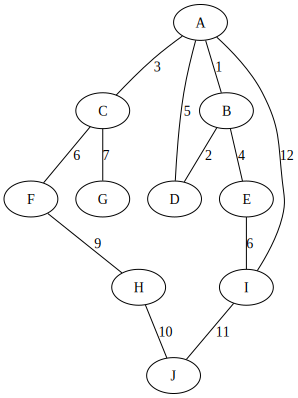

In [ ]:
from diktyonphi import Graph, GraphType, Node, Edge
import random

def neighbor_matrix(graph: Graph):
    matrix = list()
    for node in graph.node_ids():
        row = list()
        neighbors = graph.get_neighbors(node)
        for potential_neighbor in graph.node_ids():
            if potential_neighbor in neighbors:
                row.append(1)
            else:
                row.append(0)
        matrix.append(row)
    return matrix

def bfs(graph: Graph, start_node_id, end_node_id):
    visited = set()
    queue = [(start_node_id, [start_node_id])]
    while queue:
        (node, path) = queue.pop(0)
        if node not in visited:
            visited.add(node)
            for neighbor in graph.get_neighbors(node):
                if neighbor == end_node_id:
                    return path + [end_node_id]
                else:
                    queue.append((neighbor, path + [neighbor]))
    return None

def dfs(graph: Graph, start_node_id, end_node_id):
    visited = set()
    stack = [(start_node_id, [start_node_id])]
    while stack:
        node, path = stack.pop()
        if node not in visited:
            visited.add(node)
            for neighbor in graph.get_neighbors(node):
                if neighbor == end_node_id:
                    return path + [end_node_id]
                else:
                    stack.append((neighbor, path + [neighbor]))
    return None

def dijkstra_search(graph: Graph, start_node_id, end_node_id):
    node_weights = dict()
    for node in graph.node_ids():
        node_weights[node] = float("inf")
    node_weights[start_node_id] = 0
    visited = set()
    stored_paths = dict()

    queue = [(0, start_node_id, [start_node_id])]
    while queue:
        queue.sort(key=lambda x: x[0])
        for i in range(len(queue)):
            if queue[i][1] not in visited:
                current_distance, current_node, path = queue.pop(i)
                visited.add(current_node)
                for neighbor in graph.get_neighbors(current_node):
                    edge = graph.node(current_node).to(neighbor)
                    weight = edge["weight"]
                    new_distance = current_distance + weight
                    if new_distance < node_weights[neighbor]:
                        node_weights[neighbor] = new_distance
                        stored_paths[neighbor] = path + [neighbor]
                        queue.append((new_distance, neighbor, path + [neighbor]))
                break
        else:
            queue.pop(0)  # If no unvisited nodes found, pop the first element
    if end_node_id in stored_paths:
        return stored_paths[end_node_id]
    raise ValueError(f"No path found from {start_node_id} to {end_node_id}")

def single_component_graph_skeleton(graph: Graph):
    skeleton = Graph(graph.type)
    skeleton_weight = 0
    unassigned_edges = []
    not_visited = set(graph.node_ids())
    
    current_node = random.choice(list(not_visited))
    not_visited.remove(current_node)
    skeleton.add_node(current_node)
    
    while not_visited:
        unassigned_edges = unassigned_edges + list(graph.node(current_node).edges())
        unassigned_edges.sort(key=lambda x: x["weight"])

        for edge in unassigned_edges:
            if edge.dest.id in not_visited:
                current_node = edge.dest.id
                skeleton.add_node(current_node)
                skeleton.add_edge(edge.src.id, edge.dest.id, {"weight": edge["weight"]})
                skeleton_weight += edge["weight"]
                not_visited.remove(current_node)
                break
        else:
            raise ValueError("wtf, to se stát nemělo")
        
        
        if not unassigned_edges:
            raise ValueError("No unassigned edges left to process, graph has more than one component.")
    
    return skeleton

def color_degree(graph: Graph):
    list_of_lists = list()
    uncollored = list(graph.node_ids())
    while uncollored:
        list_n = list()
        unhandled = uncollored[:]
        while unhandled:
            current_node = random.choice(unhandled)
            list_n.append(current_node)
            uncollored.remove(current_node)
            unhandled.remove(current_node)
            for neighbor in graph.get_neighbors(current_node):
                if neighbor in unhandled:
                    unhandled.remove(neighbor)
        list_of_lists.append(list_n)

    return len(list_of_lists)

def cycle_detection(graph: Graph, all=False):
    """ 
    Detekuje cykly v grafu.
    Args:
        graph (Graph): _description_
        all (bool, optional): Pokud je True, vrátí všechny cykly. Pokud False, vrátí pouze jeden cyklus. Defaults to False.
    """
    def detect_cycles_from_suspect_node(graph: Graph, starting_node, cykly, cykly_imprint):
        for direct_neighbor in graph.get_neighbors(starting_node):
            stack = [(direct_neighbor, [direct_neighbor])]
            while stack:
                node, path = stack.pop()
                for neighbor in graph.get_neighbors(node):
                    if neighbor == starting_node and len(path) >= 2 and frozenset(path + [neighbor]) not in cykly_imprint and neighbor not in path:
                        cykly.append(path + [neighbor])
                        cykly_imprint.add(frozenset(path + [neighbor]))
                    elif neighbor not in path:
                        stack.append((neighbor, path + [neighbor]))

    cykly = list()
    cykly_imprint = set()
    # pokryje komplexní graf
    for node in graph.node_ids():
        if graph.node(node).out_degree >= 3:
            detect_cycles_from_suspect_node(graph, node, cykly, cykly_imprint)
        if all == False and len(cykly) > 0:
            return cykly

    # pokryje graf co je cyklus (tudíž ten kde deg všech nodes je 2)
    if len(cykly) == 0:
        detect_cycles_from_suspect_node(graph, random.choice(graph.node_ids()), cykly, cykly_imprint)
    return cykly
    

## započet stuff
def uplny_graf(pocet_uzlu: int):
    graf = Graph(GraphType.UNDIRECTED)
    for i in range(pocet_uzlu):
        graf.add_node(f"{i}")

    for i in range(pocet_uzlu):
        for j in range(i+1, pocet_uzlu):
            graf.add_edge(f"{i}",f"{j}")
    return graf

def test_uplnosti(graf: Graph):
    uplny = True
    for node in graf.node_ids():
        if graf.node(node).out_degree != len(graf.node_ids) - 1:
            uplny = False
    return uplny

def test_komponenty(graf: Graph):
    if graf.type != GraphType.UNDIRECTED:
        raise ValueError("This function only works for undirected graphs.")
    visited = set()
    components = 0

    def dfs(node):
        stack = [node]
        while stack:
            current = stack.pop()
            if current not in visited:
                visited.add(current)
                for neighbor in graf.get_neighbors(current):
                    if neighbor not in visited:
                        stack.append(neighbor)

    for node in graf.node_ids():
        if node not in visited:
            dfs(node)
            components += 1

    return components

def is_tree(graf: Graph):
    if graf.type != GraphType.UNDIRECTED:
        raise ValueError("This function only works for undirected graphs.")
    
    if len(graf.node_ids()) == 0:
        return True
    
    if len(graf.edge_ids()) != len(graf.node_ids()) - 1:
        return False
    
    components = test_komponenty(graf)
    if components > 1:
        return False
    
    return True

g = Graph(GraphType.UNDIRECTED)

g.add_node("A")
g.add_node("B")
g.add_node("C")
g.add_node("D")
g.add_node("E")
g.add_node("F")
g.add_node("G")
g.add_node("H")
g.add_node("I")
g.add_node("J")



g.add_edge("A", "B", {"weight": 1})
g.add_edge("A", "C", {"weight": 3})
g.add_edge("A", "D", {"weight": 5})
g.add_edge("B", "D", {"weight": 2})
g.add_edge("B", "E", {"weight": 4})
g.add_edge("C", "F", {"weight": 6})
g.add_edge("C", "G", {"weight": 7})
g.add_edge("E", "I", {"weight": 6})
g.add_edge("F", "H", {"weight": 9})
g.add_edge("H", "J", {"weight": 10})
g.add_edge("I", "J", {"weight": 11})
g.add_edge("I", "A", {"weight": 12})



bfs_path = bfs(g, "A", "J")
dfs_path = dfs(g, "A", "J")
dijkstra_path = dijkstra_search(g, "A", "J")


print("------")


print("BFS Path:", bfs_path)
print("DFS Path:", dfs_path)
print("Dijkstra Path:", dijkstra_path)

print("matrix:")
print(neighbor_matrix(g), len(neighbor_matrix(g)))



g

4
[['B', 'E', 'I', 'A'], ['B', 'E', 'I', 'J', 'H', 'F', 'C', 'A'], ['B', 'D', 'A'], ['C', 'F', 'H', 'J', 'I', 'A'], ['C', 'F', 'H', 'J', 'I', 'E', 'B', 'D', 'A'], ['D', 'B', 'E', 'I', 'A']]


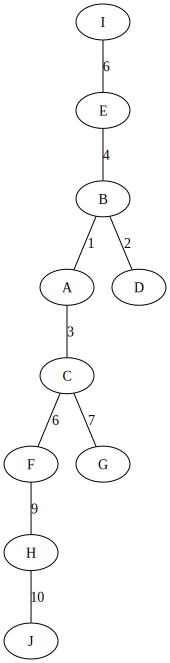

In [ ]:
print(color_degree(g))
print(cycle_detection(g))
single_component_graph_skeleton(g)
